***

This notebook contains the code samples found in Chapter 6, Section 2 of "Deep Learning with R"

***


Let's try to use a RNN model on the IMDB movie review classification problem. First, let's preprocess the data:

In [1]:
install.packages('keras')
library(keras)

max_features <- 10000  # Number of words to consider as features
maxlen <- 500  # Cuts off texts after this many words (among the max_features most common words)
batch_size <- 32

cat("Loading data...\n")
imdb <- dataset_imdb(num_words = max_features)
c(c(input_train, y_train), c(input_test, y_test)) %<-% imdb 
cat(length(input_train), "train sequences\n")
cat(length(input_test), "test sequences")

cat("Pad sequences (samples x time)\n")
input_train <- pad_sequences(input_train, maxlen = maxlen)
input_test <- pad_sequences(input_test, maxlen = maxlen)
cat("input_train shape:", dim(input_train), "\n")
cat("input_test shape:", dim(input_test), "\n")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppTOML’, ‘here’, ‘png’, ‘config’, ‘tfautograph’, ‘reticulate’, ‘tensorflow’, ‘tfruns’, ‘zeallot’




Loading data...


Loaded Tensorflow version 2.8.0



25000 train sequences
25000 test sequencesPad sequences (samples x time)
input_train shape: 25000 500 
input_test shape: 25000 500 


Let's train a simple recurrent network using a `layer_embedding()` and `layer_simple_rnn()`.

In [2]:
model <- keras_model_sequential() %>%
  layer_embedding(input_dim = max_features, output_dim = 32) %>%
  layer_simple_rnn(units = 32) %>%
  layer_dense(units = 1, activation = "sigmoid")

model %>% compile(
  optimizer = "rmsprop",
  loss = "binary_crossentropy",
  metrics = c("acc")
)

history <- model %>% fit(
  input_train, y_train,
  epochs = 10,
  batch_size = 128,
  validation_split = 0.2
)

Let's display the training and validation loss and accuracy:

`geom_smooth()` using formula 'y ~ x'



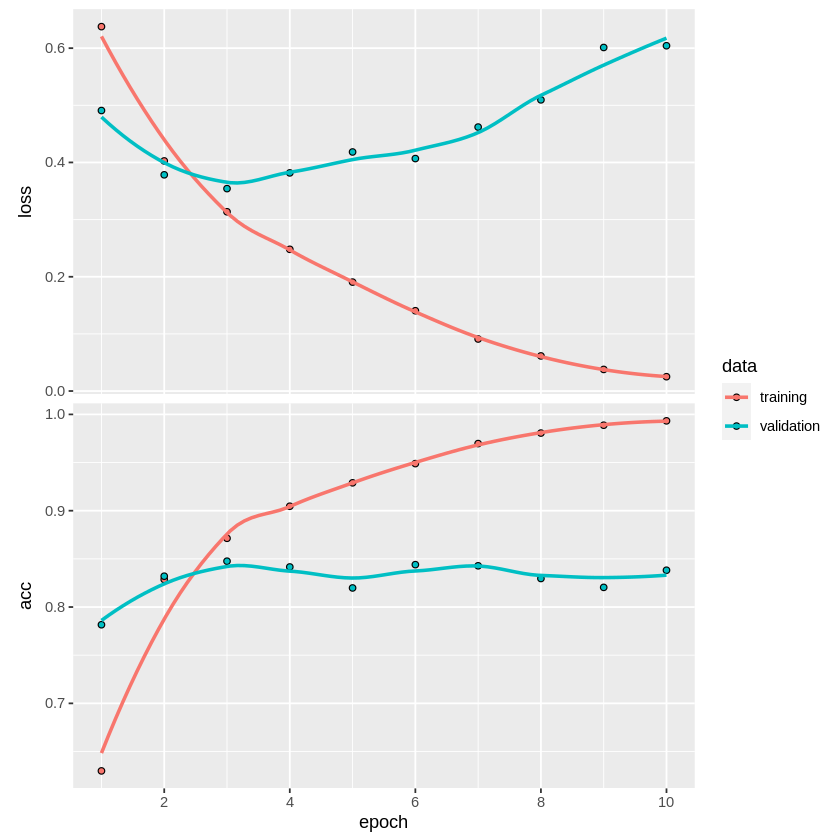

In [3]:
plot(history)

As a reminder, in chapter 3, the first naive approach to this dataset got  a test accuracy of 88%. Unfortunately, this small recurrent network doesn't perform well compared to this baseline (only 84% validation accuracy). Part of the problem is that your inputs only consider the first 500 words, rather than full sequences -- hence the RNN has access to less information than the earlier baseline model. The remainder of the problem is that `layer_simple_rnn()`  isn't good at processing long sequences, such as text. Other types of recurrent layers perform much better. Let's look at some more advanced layers.

## A concrete LSTM example in Keras

Now let's switch to more practical concerns: we will set up a model using a LSTM layer and train it on the IMDB data. Here's the network,similar to the one with `layer_simple_rnn()` that we just presented. We only specify the output dimensionality of the LSTM layer, and leave every  other argument (there are lots) to the Keras defaults. Keras has good defaults, and things will almost always "just work" without you having to spend time tuning parameters by hand.

In [4]:
model <- keras_model_sequential() %>% 
  layer_embedding(input_dim = max_features, output_dim = 32) %>% 
  layer_lstm(units = 32) %>% 
  layer_dense(units = 1, activation = "sigmoid")

model %>% compile(
  optimizer = "rmsprop", 
  loss = "binary_crossentropy", 
  metrics = c("acc")
)

history <- model %>% fit(
  input_train, y_train,
  epochs = 10,
  batch_size = 128,
  validation_split = 0.2
)

`geom_smooth()` using formula 'y ~ x'



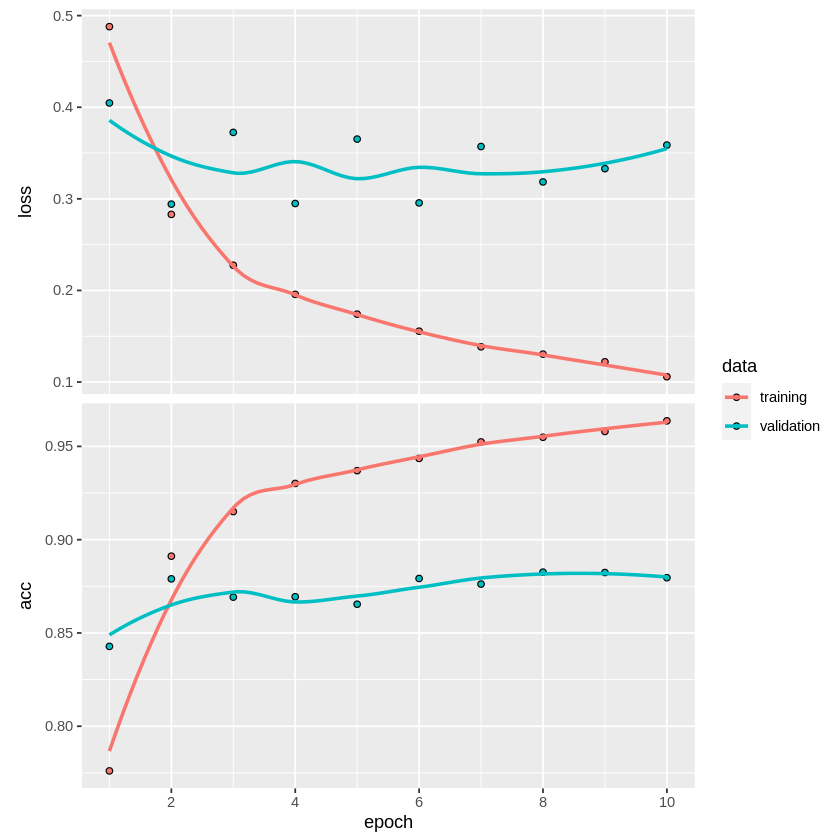

In [5]:
plot(history)